### Data Loading

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

In [51]:
df=pd.read_csv('Medical-Insurance.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2772 non-null   object 
 1   gender                2772 non-null   int64  
 2   bmi                   2772 non-null   float64
 3   number of children    2772 non-null   int64  
 4   smoker or non smoker  2772 non-null   object 
 5   region                2772 non-null   int64  
 6   insurance             2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [52]:
df['smoker or non smoker'].value_counts()

smoker or non smoker
0    2201
1     564
?       7
Name: count, dtype: int64

In [53]:
df=df[df['smoker or non smoker']!='?']

In [54]:
df['smoker or non smoker'].value_counts()

smoker or non smoker
0    2201
1     564
Name: count, dtype: int64

In [55]:
df['age'].value_counts()

age
18    148
19    142
52     62
47     62
45     62
23     61
28     60
46     60
22     60
21     60
54     60
51     60
26     60
48     58
25     58
27     58
50     58
53     57
20     57
44     56
49     56
32     56
56     56
30     56
24     56
41     56
43     54
40     54
33     54
42     54
57     54
29     53
31     53
58     52
37     52
34     52
59     52
55     51
39     50
36     50
35     50
38     49
62     48
60     46
63     46
61     46
64     46
?       4
Name: count, dtype: int64

In [56]:
df=df[df['age']!='?']

In [57]:
df['age'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2761 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2761 non-null   object 
 1   gender                2761 non-null   int64  
 2   bmi                   2761 non-null   float64
 3   number of children    2761 non-null   int64  
 4   smoker or non smoker  2761 non-null   object 
 5   region                2761 non-null   int64  
 6   insurance             2761 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 172.6+ KB


In [58]:
df['age']=df['age'].astype(int)
df['smoker or non smoker']=df['smoker or non smoker'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2761 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   2761 non-null   int64  
 1   gender                2761 non-null   int64  
 2   bmi                   2761 non-null   float64
 3   number of children    2761 non-null   int64  
 4   smoker or non smoker  2761 non-null   int64  
 5   region                2761 non-null   int64  
 6   insurance             2761 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 172.6 KB


In [60]:
df.duplicated().sum()

np.int64(1424)

In [61]:
df=df.drop_duplicates().reset_index(drop=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1337 non-null   int64  
 1   gender                1337 non-null   int64  
 2   bmi                   1337 non-null   float64
 3   number of children    1337 non-null   int64  
 4   smoker or non smoker  1337 non-null   int64  
 5   region                1337 non-null   int64  
 6   insurance             1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.2 KB


In [63]:
outlier_info={}
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_info[col] = outliers
print(outlier_info)


{'age': np.int64(0), 'gender': np.int64(0), 'bmi': np.int64(9), 'number of children': np.int64(0), 'smoker or non smoker': np.int64(274), 'region': np.int64(0), 'insurance': np.int64(139)}


In [64]:
df.corr()

,age,gender,bmi,number of children,smoker or non smoker,region,insurance
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,-0.006691,0.298308
gender,-0.019814,1.000000,0.046397,0.017848,0.076596,0.017150,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.261999,0.198401
number of children,0.041536,0.017848,0.012755,1.000000,0.007331,-0.020206,0.067389
smoker or non smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.053454,0.787234
region,-0.006691,0.017150,0.261999,-0.020206,0.053454,1.000000,0.056070
insurance,0.298308,0.058044,0.198401,0.067389,0.787234,0.056070,1.000000


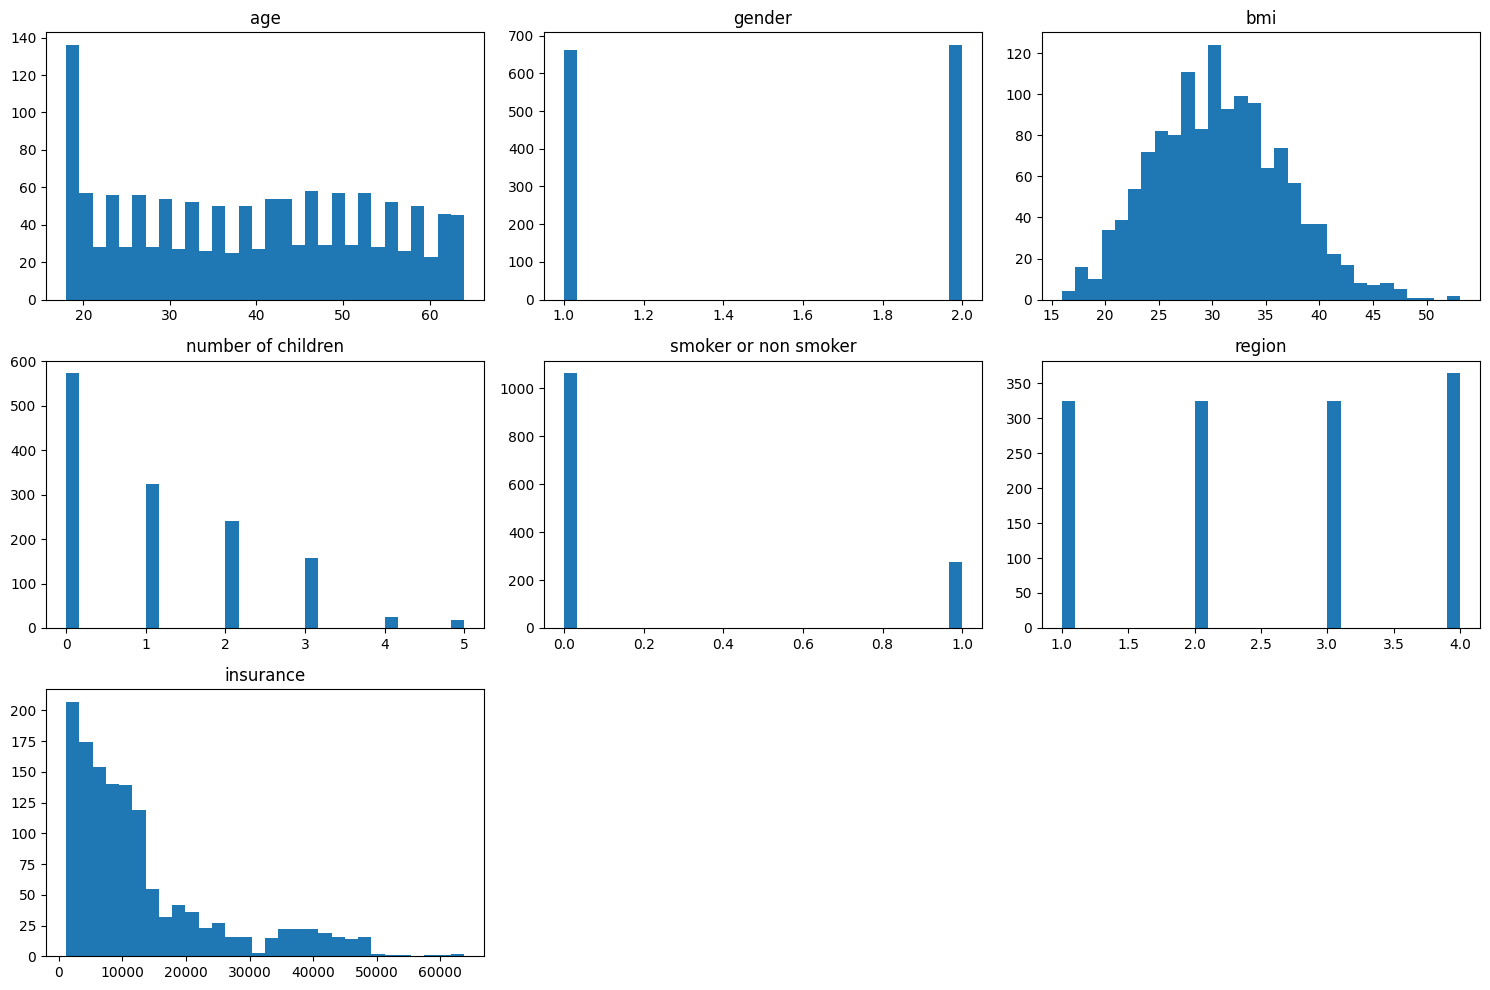

In [65]:
df.hist(bins=30,figsize=(15,10),grid=False)
plt.tight_layout()
plt.show()

<Axes: >

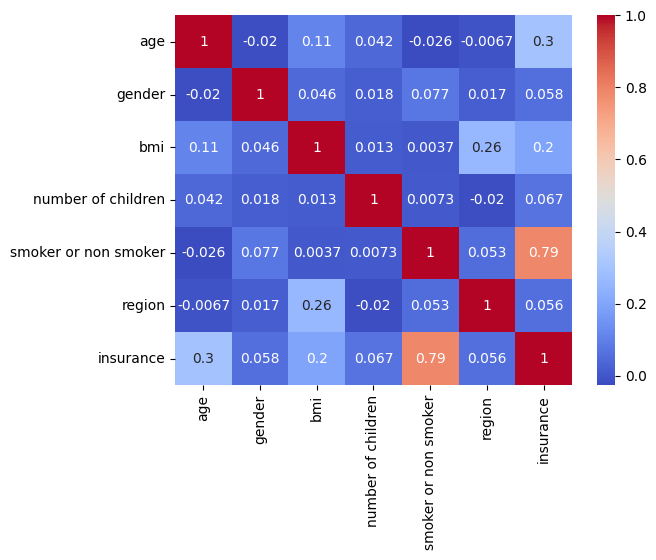

In [66]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [67]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
print(df.columns)

Index(['age', 'gender', 'bmi', 'number_of_children', 'smoker_or_non_smoker',
       'region', 'insurance'],
      dtype='object')


In [68]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['insurance']),df['insurance'],test_size=0.25,random_state=42)

In [69]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [70]:
y_pred=linreg.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)
r2_train = linreg.score(X_train, y_train)
gap = r2_train-r2_test

mae,mse,rmse,r2_test,r2_train,gap

(4061.0383834622294,
 31710698.074300025,
 np.float64(5631.225272913527),
 0.7310625705660194,
 0.7536111000499254,
 0.022548529483905955)

In [71]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": linreg.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coef_df)

                Feature   Coefficient
4  smoker_or_non_smoker  24278.250728
3    number_of_children    331.604820
2                   bmi    331.329963
0                   age    256.375180
5                region   -246.014823
1                gender   -136.074124


In [72]:
vif_data = (
    pd.DataFrame({
        "Feature": X_train.columns,
        "VIF": [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    })
)

vif_top3 = vif_data.nlargest(3, "VIF")

model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
residuals = model.resid

shapiro_p = shapiro(residuals).pvalue
dw_stat = sm.stats.durbin_watson(residuals)
bp_p = het_breuschpagan(residuals, model.model.exog)[1]

vif_top3, shapiro_p, dw_stat, bp_p

(  Feature        VIF
 2     bmi  15.660979
 1  gender   8.077949
 0     age   7.637387,
 np.float64(4.650850807408889e-25),
 np.float64(1.9656417759496019),
 np.float64(4.803360147776599e-15))

In [79]:
X_poly = X_train[['smoker_or_non_smoker']].values
y_poly = y_train.values

poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

param_grid = {
    'poly_features__degree': list(range(1, 11))
}

grid_search = GridSearchCV(poly_pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_poly, y_poly)

optimal_degree = grid_search.best_params_['poly_features__degree']
best_cv_r2 = grid_search.best_score_

optimal_degree, best_cv_r2

(1, np.float64(0.6330063002769257))

In [80]:
ridge_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=optimal_degree)),
    ('scaler', StandardScaler()),
    ('ridge_model', Ridge())
])

ridge_param_grid = {'ridge_model__alpha': [0.01, 0.1, 1, 10]}

ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='r2')
ridge_grid_search.fit(X_train, y_train)

ridge_best_alpha = ridge_grid_search.best_params_['ridge_model__alpha']
ridge_r2_test = ridge_grid_search.score(X_test, y_test)

ridge_best_alpha,ridge_r2_test

(10, 0.7319320572637051)

In [81]:
lasso_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=optimal_degree)),
    ('scaler', StandardScaler()),
    ('lasso_model', Lasso(max_iter=10000))
])

lasso_param_grid = {'lasso_model__alpha': [0.01, 0.1, 1, 10]}

lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='r2')
lasso_grid_search.fit(X_train, y_train)

lasso_best_alpha = lasso_grid_search.best_params_['lasso_model__alpha']
lasso_r2_test = lasso_grid_search.score(X_test, y_test)
lasso_n_nonzero = np.sum(lasso_grid_search.best_estimator_.named_steps['lasso_model'].coef_ != 0)

lasso_best_alpha, lasso_r2_test, lasso_n_nonzero

(10, 0.7309894423915553, np.int64(6))

In [83]:

cv_folds = 3

r2_cv_scores = cross_val_score(
    ridge_grid_search.best_estimator_, X_train, y_train,
    cv=cv_folds, scoring='r2'
)
rmse_cv_scores = np.sqrt(
    -cross_val_score(ridge_grid_search.best_estimator_, X_train, y_train,
                     cv=cv_folds, scoring='neg_mean_squared_error')
)

r2_mean, r2_std = r2_cv_scores.mean(), r2_cv_scores.std()
rmse_mean, rmse_std = rmse_cv_scores.mean(), rmse_cv_scores.std()

train_r2 = ridge_grid_search.best_estimator_.score(X_train, y_train)

if train_r2 - r2_mean > 0.1:
    model_diagnosis = "High variance"
elif train_r2 < 0.3:
    model_diagnosis = "High bias"
else:
    model_diagnosis = "Nice fitting"

results = {
    "CV Folds": cv_folds,
    "R2 Mean": r2_mean,
    "R2 Std": r2_std,
    "RMSE Mean": rmse_mean,
    "RMSE Std": rmse_std,
    "Diagnosis": model_diagnosis
}

results


{'CV Folds': 3,
 'R2 Mean': np.float64(0.7477873691871896),
 'R2 Std': np.float64(0.018680446058643607),
 'RMSE Mean': np.float64(6251.648319300533),
 'RMSE Std': np.float64(200.54397126266926),
 'Diagnosis': 'Nice fitting'}